##  Intro to Bokeh: Exercise notebook
In this notebook you'll practice the following:
* Pandas masking
* Pandas resampling
* Visualization with Bokeh
    * Line plots
    * Multi-line plots
    * Areas
    * Annotations
* Replicate Beatnik Dashboard.

All the necessary imports and so forth

In [ ]:
import pandas as pd
import numpy as np

## Use Case
#### You are given data of a patient that contains several biometric data, and a nurse asks you a way to visualize the heart rate of said patient across time.



This type of data can be quasi-real-time, real-time or static.

In this case, we have the data of a patient that is not longer being monitored. Hence, it is already in a nice and structured csv format.

We already load the data for you, and now you are to follow the nurse requirements!
Also, keep in mind that in the real world the requirements change constantly, so expect things to change as you go!

*Note* The nurse may appear to be demanding... but trust me it is still less demanding than real life nurses and clients.

In [ ]:
path = "https://raw.githubusercontent.com/vohcolab/PandaViz-Workshop/main/Beatnik%20Use%20case/patient.csv" #.csv file of one patient
df = pd.read_csv(path,index_col= 0) #Inspect the csv and read the docs to undersand why we had to set the param index_col = 0
df.index = pd.to_datetime(df.index) #Why do we need to do this?

With the data loaded, you inspect the file, to understand its structure.

In [ ]:
df

In [ ]:
df.describe()

In [ ]:
df.info()

### Exercise 1:
##### The nurse is only interested on the heart rate field for now.

### Exercise 2
##### The nurse does not like lists, she just wants to wants to see the max, min and average of the patients heartrate.

### Exercise 2.1
##### The nurse is still not happy with the results, she is saying that she should be able to see these statistics by day.


### Exercise 2.2
##### The nurse wants to see the max, min and average of the patients heart rate by 3H but only in the last 7 days of measures

In [ ]:
#Create a mask with the 7 last days of measures

In [ ]:
#Use the mask, resample by 3H and get the required info

### Exercise 2.3
##### The nurse wants to see the max, min and average of the patients heart rate by 3H, but only night time (Between 23 and 8)

In [ ]:
#After 23 or before 8 it is night time. Create a mask that describes that.


In [ ]:
#Use the mask, resample by 3H and get the required info

*If there are any NaNs, just drop it like its hot!*

## Exercise 2.4
### The nurse now wants to see both the day time and night time, but differentiated!
*Use 3H as the resampling size*

**Note** *Technically* all you need to do is group by day and night (Period).

Keep in mind that sometimes it is easier to manipulate the data and create virtual columns, than try to work directly with the data that you have.

In [ ]:
#To help group

### Exercise 3.
#### The nurse is complaining that she takes too long to read the numbers on a table, instead she wants too see pretty lines on a plot.
Plot only exercises 2.1 and 2.2. Use DataFrames .plot() function for this.

What is your takeaway from these plots?

### Exercise 4
#### The nurse is enjoying the plots, but she thinks that they are a bit hard to read.  
##### Use Bokeh to enrich these visualizations!

In [ ]:
from bokeh.plotting import figure,show
from bokeh.io import output_notebook
from bokeh.models import Legend,LegendItem,Range1d,ColumnDataSource,DatetimeTickFormatter, Text,LabelSet,DateRangeSlider,HoverTool,MultiLine,LinearAxis #You might not need all of these, but feel free to try and use it!
from bokeh.layouts import row,column
output_notebook()

### Exercise 4.1
#### The nurse only wants the mean heartrate every 3H. Plot that.

In [ ]:
fig = figure(width=800,height=500,x_axis_type="datetime",x_axis_label="Time",y_axis_label="Heartrate")


In [ ]:
fig.line.... #TODO

In [ ]:
show(fig)

### Exercise 4.2
#### The nurse now also wants to have the standard deviation present on the plot to understand how much it varies.

In [ ]:
 #Compute the std(ddof=1) 

In [ ]:
fig.line....  #Add the computed std to the plot


In [ ]:
show(fig)

## Exercise 4.3
#### The nurse does not like the previous plot. She suggests to put the standard deviation as an area around the mean.
*You can keep using 3 hours as your sample*

In [ ]:
interval = (mean.index.min(),mean.index.max()) #

In [ ]:
fig = figure(width=800,height=500,x_axis_type="datetime",x_axis_label="Time",y_axis_label="Heartrate",x_range=Range1d(start = interval[0],end=interval[1],bounds=interval)) #What is this interval for?

In [ ]:
#Add the heartrate line, you know the drill by now.

In [ ]:
#Get the upper and lower bounds of the area


In [ ]:
fig.varea...#TODO

In [ ]:
fig.legend.click_policy="hide" #What is this for?
show(fig)

#### Free-roam ! Play around with the previous code and try to figure out what is going on and answer the following questions!

1. What is that interval variable used for?
2. What happens if you add **tools=""** to the parameters of figure?
    1. What happens if you add hover, xwheel_zoom or pan to tools?
3. Try to change 3H to 1H, 1S, 1M, etc. Try it out and see what happens to the data and respective plots

Feel free to discuss any of these questions !

### Exercise 5
#### The nurse stikes again! Now, she wants the plot to differentiate day from night! 
##### Furthermore, she is interested mostly in the last week, so no need to show everything from the get go.
* Day  = orange
* night = blue

You can add whatever tools you want.

*Hint* : Remember the learning books about plotting multiple lines.

*Another hint*: A line can only have one color. The same happens for areas (varea)

### Should look similar to this
But dont forget to add whatever tools you deem necessary and improve whatever you think it should be improved!

*For example, a red line when y = 120 so its easier to see if any point is above this threshold*

![bokeh_plot.png](https://raw.githubusercontent.com/vohcolab/PandaViz-Workshop/main/Beatnik%20Use%20case/wristband_plot.png)
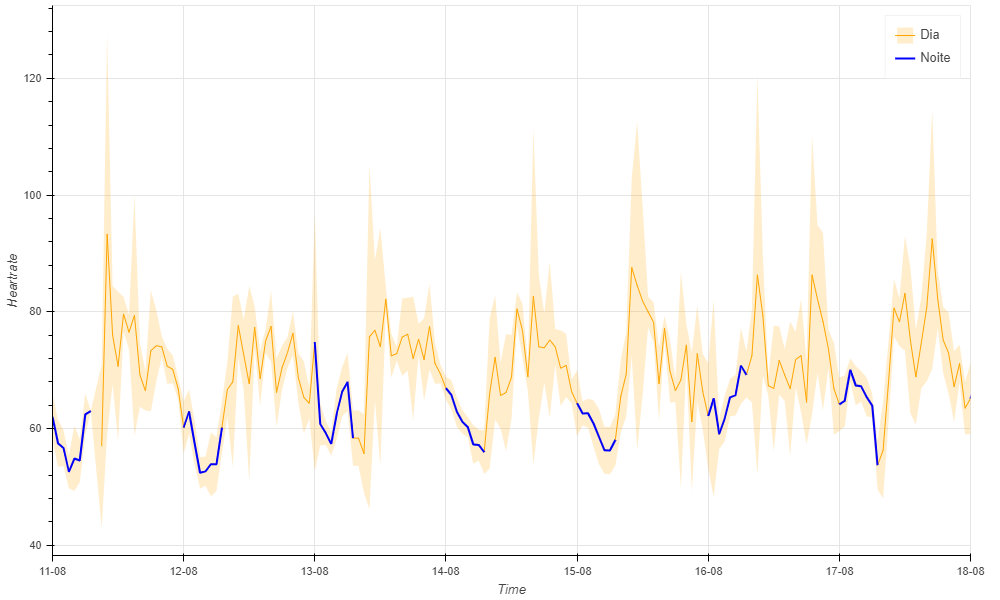

### The nurse loved the plot! But you know, as they say, give an hand and they want the whole arm..



## Exercise 6
### The nurse now wants to see scatter plots with the bpm, diastolic and systolic fields.
#### Each scatter should have different colors!

**Note** These measures are taken once, each day.

In [ ]:
#Select the data that you need.

 #Should you drop nans?

In [ ]:
fig = figure(width=800,height=500,x_axis_type="datetime",x_axis_label="Time",y_axis_label="Values",x_range=Range1d(start = interval[0],end=interval[1],bounds=interval),tools="hover,save")

In [ ]:
show(fig)

## Exercise 6.1
#### The nurse doesnt need to see that much samples, resample it to 2 days (2D).

In [ ]:
#resample
bpm_2D = #TODO

In [ ]:
#TODO

### The nurse thinks that it's uhmm, ugly. 
She gave the following suggestions:
* Each value should be written in the plot as [text](https://docs.bokeh.org/en/latest/docs/user_guide/annotations.html).
* BPM values should be plotted with circles
* Diastolic and sistolic should be an area.


*For text annotations look for LabelSet on the link above*


In [ ]:
bpm = bpm.resample("1D").mean()
 #Change the resample value if you want.

Should look similar to this.

![bokeh_plot.png](https://raw.githubusercontent.com/vohcolab/PandaViz-Workshop/main/Beatnik%20Use%20case/sixdotone.png)

## Exercise 7
### The nurse now wants to correlate the heart rate (exercise 5) with the patient activity!

##### Patient activity (steps) are recorded daily at day X, with the data of day X - 1. These data is always one day late! Keep that in mind.

##### Think about how you can plot the step data.

*Try with different resample values*


In [ ]:
#Select the required fields and resample as you wish.


In [ ]:
#Compute the mean and the std.


In [ ]:
#mean["steps"] = mean["steps"].shift(periods=...) #Steps are one day late. Shift the steps back one day. The resampling value used changes the number of shifts needed!

In [ ]:
fig = figure(width=800,height=500,x_axis_type="datetime",x_axis_label="Time",y_axis_label="Heartrate",tools="pan,hover,xwheel_zoom,reset") #Add bounds and a initial range of the 7 past days.


*Hint* The x axis is time hence by default the width of a vbar is measured in miliseconds, where the default value is 1. If you want a vbar to occupy a whole day, transform ms to day.

In [ ]:
fig.line...
fig.vbar...


#You are free to try other plots.

In [ ]:
fig.legend.click_policy="hide" 
fig.line(mean.index,[120 for i in range(0,len(mean.index))],color="red") # Above 120
show(fig)

*Hint* You are plotting measures with different ranges. Do not forget to normalize/standardize the steps, else the plot will be too hard to read!

## Free roam !
##### What would you improve here?
##### Do you think this plot is any good for the nurse or doctors?
##### How can you help the nurses work so that she/he can give better assistance to his/her patient?w
##### How can you integrate the rest of the data ? 
##### There are more plots in the dashboard, can you do them ? Furthermore, can you [connect](https://docs.bokeh.org/en/latest/docs/user_guide/interaction/linking.html) them in any way? 

*Hints* For multiple plots you can use [layouts](https://docs.bokeh.org/en/latest/docs/user_guide/layout.html). You can place plots or any other Bokeh glyph in columns and rows, etc. 